2994
[ 2.21378103  1.76047409 22.61844861]


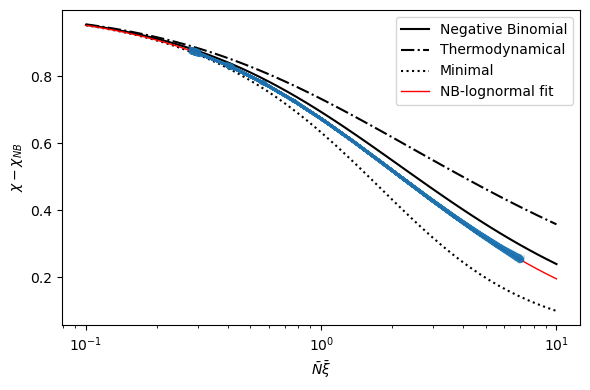

In [4]:
def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x
def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x,label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i],yerr=chi_stds[i],c='C00',alpha=.1)
def get_filename(rmin,rmax,rbin,njk,ns,cosm,space):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}-*.dat'
    return filename
def lognorm(x, mu, sigma, norm):
    return np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/norm

import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import ascii
from scipy.optimize import curve_fit

# Parameters
cosm = 'fiducial'
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(25)
njk = int(10)
space = 'zspace'
filedir = '../data/output/'

filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space)

filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print(nsim)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

chis = []
nxis = []
chi_stds = []

# Read all files
for file in filelist:
    #print(file)
    data = ascii.read(file)
    chis.append( data['chi'] )
    nxis.append( data['N_mean']*data['xi'] )
    chi_stds.append( data['chi_std'] )

plot_rvps(ax,nxis,chis,chi_stds)

chi = chis[0]
NXi = nxis[0]
#CURVE_FIT
p0 = 2, 1.7, 22 # initial guesses for mu,sigma,norm:
p_opt,p_cov = curve_fit(lognorm,xdata=NXi,\
                                    ydata=-1*(chi-NB(NXi)))
print(p_opt)
x = np.geomspace(1E-1,1E1,50)
ax.plot(x, NB(x)-lognorm(x,p_opt[0],p_opt[1],p_opt[2]),color='r',lw=1,label='NB-lognormal fit')

ax.set_xscale('log')
ax.set_xlabel(r'$\bar{N}\bar{\xi}$')
ax.set_ylabel(r'$\chi-\chi_{NB}$')
plt.legend()
plt.tight_layout()
plt.show()

2994
[ 2.21378103  1.76047409 22.61844861]


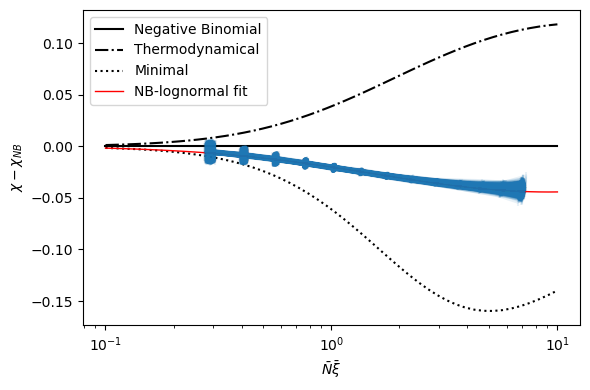

In [6]:
def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x
def plot_rvps(ax,nxis,chis,chi_stds):
    x = np.geomspace(1E-1,1E1,50)
    c='k'
    ax.plot(x,NB(x)-NB(x),label='Negative Binomial',c=c)
    ax.plot(x,term(x)-NB(x),label='Thermodynamical',c=c,ls='-.')
    ax.plot(x,(1-np.e**(-x))/x-NB(x),label='Minimal',c=c,ls=':')
    #ax.plot(x[:-15],1-x[:-15]/2-NB(x[:-15]),label='Gauss',c=c)
    for i in range(len(chis)):
        ax.errorbar(nxis[i],chis[i]-NB(nxis[i]),yerr=chi_stds[i],c='C00',alpha=.1)
def get_filename(rmin,rmax,rbin,njk,ns,cosm,space):
    filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}-*.dat'
    return filename
def lognorm(x, mu, sigma, norm):
    return np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/norm

import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import ascii
from scipy.optimize import curve_fit

# Parameters
cosm = 'fiducial'
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(25)
njk = int(10)
space = 'zspace'
filedir = '../data/output/'

filename = get_filename(rmin,rmax,rbin,njk,ns,cosm,space)

filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print(nsim)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

chis = []
nxis = []
chi_stds = []

# Read all files
for file in filelist:
    #print(file)
    data = ascii.read(file)
    chis.append( data['chi'] )
    nxis.append( data['N_mean']*data['xi'] )
    chi_stds.append( data['chi_std'] )

plot_rvps(ax,nxis,chis,chi_stds)

chi = chis[0]
NXi = nxis[0]
#CURVE_FIT
p0 = 2, 1.7, 22 # initial guesses for mu,sigma,norm:
p_opt,p_cov = curve_fit(lognorm,xdata=NXi,\
                                    ydata=-1*(chi-NB(NXi)))
print(p_opt)
x = np.geomspace(1E-1,1E1,50)
ax.plot(x, -lognorm(x,p_opt[0],p_opt[1],p_opt[2]),color='r',lw=1,label='NB-lognormal fit')

ax.set_xscale('log')
ax.set_xlabel(r'$\bar{N}\bar{\xi}$')
ax.set_ylabel(r'$\chi-\chi_{NB}$')
plt.legend()
plt.tight_layout()
plt.show()